In [1]:
# Zarur kutubxonalarni import qilamiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [9]:
# 1-qadam: Ma'lumotlarni yuklash
df = pd.read_csv("C:/Users/user/Desktop/Data.csv")  # Ma'lumotlar faylini yuklaymiz

In [11]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [13]:
# Ma'lumotlarni tayyorlash
# Faraz qilaylik, ma'lumotlar 'feature1', 'feature2' va 'label' nomli ustunlardan iborat
# Bu nomlarni o'zingizning ma'lumotlar faylingizga mos ravishda o'zgartiring

X = df[['Clump Thickness', 'Bare Nuclei']].values  # X - xususiyatlar (features)
y = df['Class'].values  # y - etiketlar (labels)

In [15]:
# Ma'lumotlarni o'qitish va test qilish uchun ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Xususiyatlarni standartlashtirish (normalizatsiya qilish)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # O'qitish ma'lumotlarini standartlashtirish
X_test = scaler.transform(X_test)  # Test ma'lumotlarini standartlashtirish

In [21]:
# Support Vector Machine (SVM) modelini yaratish
model = svm.SVC(kernel='linear')  # Kernelni 'linear' qilib tanladik. Boshqa variantlar ham bor, masalan 'rbf', 'poly'
model.fit(X_train, y_train)  # Modelni o'qitish

SVC(kernel='linear')

In [23]:
# Prognozlar qilish
y_pred = model.predict(X_test)  # Test ma'lumotlari bo'yicha prognozlar qilish

In [25]:
# Modelning aniqligini hisoblash
accuracy = accuracy_score(y_test, y_pred)  # Aniqlikni hisoblash
print(f"Modelning aniqligi: {accuracy * 100:.2f}%")  # Aniqlikni foizda chiqarish

Modelning aniqligi: 94.89%


In [29]:
# Qaror chegarasini va ma'lumotlarni grafikda ko'rsatish
# Qaror chegarasini ko'rsatish uchun meshgrid yaratamiz
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))

In [31]:
# Meshgrid bo'yicha modelni bashorat qilamiz
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # Z ni xx va yy o'lchamlariga moslashtiramiz

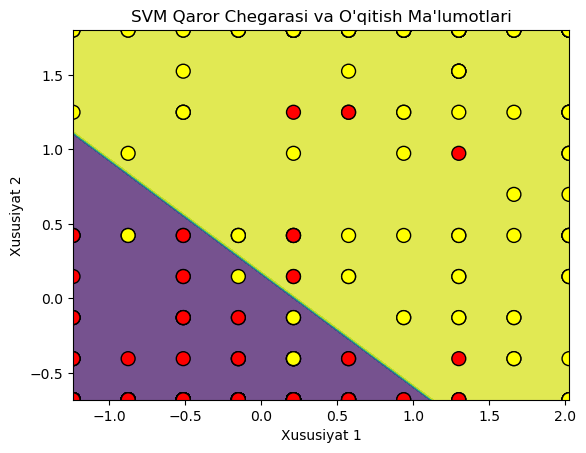

In [33]:
# Qaror chegarasini chizish
plt.contourf(xx, yy, Z, alpha=0.75)  # Qaror chegarasini to'ldirib chizamiz
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap='autumn')  # O'qitish ma'lumotlarini chizish
plt.title('SVM Qaror Chegarasi va O\'qitish Ma\'lumotlari')  # Grafik sarlavhasi
plt.xlabel('Xususiyat 1')  # X o'q nomi
plt.ylabel('Xususiyat 2')  # Y o'q nomi
plt.show()  # Grafikni chiqarish

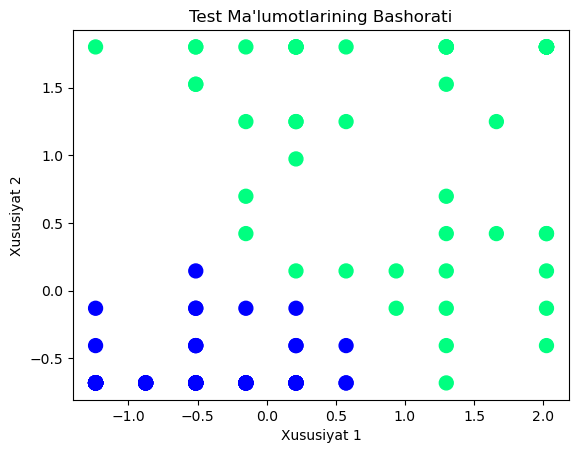

In [37]:
# Test ma'lumotlarini bashorat qilish va ularni chizish
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o', s=100, cmap='winter')  # Test ma'lumotlarini bashorat qilish
plt.title('Test Ma\'lumotlarining Bashorati')  # Grafik sarlavhasi
plt.xlabel('Xususiyat 1')  # X o'q nomi
plt.ylabel('Xususiyat 2')  # Y o'q nomi
plt.show()  # Grafikni chiqarish